<a href="https://colab.research.google.com/github/2coffeeboi2/CODSOFT/blob/main/CODSOFT_INTERNSHIP_Task_2_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODSOFT INTERNSHIP
# Task 2: Movie Rating Prediction
# Author: Aab El Roi
# Field: Data Science
# Batch: September 2024

# AIM

# The aim of this project is to develop a model that predicts movie ratings based on features such as genre, director, and actors. This involves preprocessing and cleaning data, creating relevant features, visualizing trends and distributions, and training a regression model to estimate ratings. The final goal is to deploy this model via a Streamlit application, allowing users to input movie details and receive predicted ratings interactively.

# 1: Import Libraries

In [10]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2: Load and Preprocess Data

In [11]:
# Load the dataset
imdb_df = pd.read_csv('/content/drive/MyDrive/CODSOFT Internship/TASK 2/IMDb Movies India.csv', encoding='unicode_escape')

# Data Preprocessing
imdb_df.dropna(inplace=True)
imdb_df.drop_duplicates(inplace=True)

imdb_df['Year'] = imdb_df['Year'].str.replace(r'[()]', '', regex=True).astype(int)
imdb_df['Duration'] = pd.to_numeric(imdb_df['Duration'].str.replace(' min', ''))
imdb_df['Genre'] = imdb_df['Genre'].str.split(', ')
imdb_df = imdb_df.explode('Genre')
imdb_df['Genre'].fillna(imdb_df['Genre'].mode()[0], inplace=True)
imdb_df['Votes'] = pd.to_numeric(imdb_df['Votes'].str.replace(',', ''))

# 3: Create Histogram of Movie Ratings

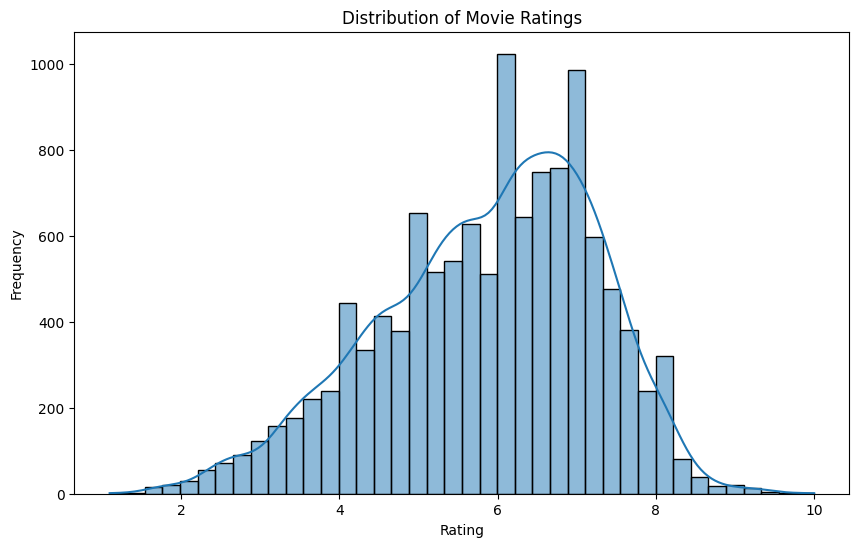

In [12]:
# Create and save histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Rating'], kde=True, bins=40)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('rating_distribution.png')
plt.show()

# 4: Feature Engineering

In [13]:
# Feature Engineering
imdb_df['Genre_mean_rating'] = imdb_df.groupby('Genre')['Rating'].transform('mean')
imdb_df['Director_encoded'] = imdb_df.groupby('Director')['Rating'].transform('mean')
imdb_df['Actor1_encoded'] = imdb_df.groupby('Actor 1')['Rating'].transform('mean')
imdb_df['Actor2_encoded'] = imdb_df.groupby('Actor 2')['Rating'].transform('mean')
imdb_df['Actor3_encoded'] = imdb_df.groupby('Actor 3')['Rating'].transform('mean')

# 5: Create Line Plot of Average Rating by Year

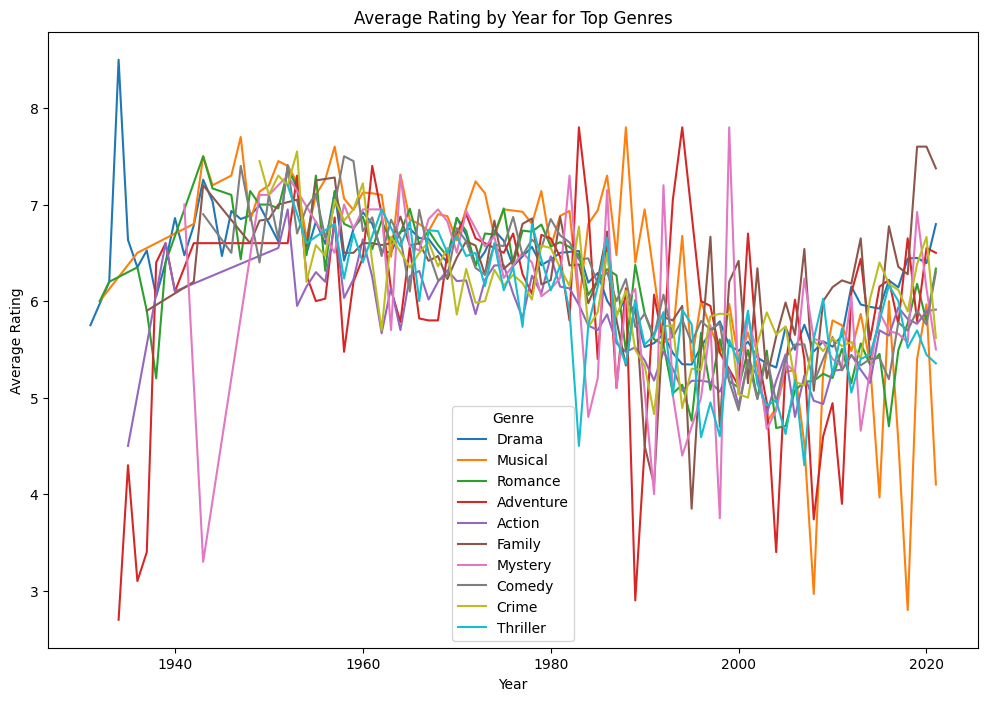

In [14]:
# Create and save line plot of average rating by year
plt.figure(figsize=(12, 8))
avg_rating_by_year = imdb_df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()
top_genres = imdb_df['Genre'].value_counts().head(10).index
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]
sns.lineplot(data=average_rating_by_year, x='Year', y='Rating', hue='Genre')
plt.title('Average Rating by Year for Top Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.savefig('avg_rating_by_year.png')
plt.show()

# 6: Prepare Data for Modeling

In [15]:
# Preparing Data
X = imdb_df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb_df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7: Train the Model and Evaluate

In [16]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean squared error: 0.4465441653985704
Mean absolute error: 0.4921902540765641
R2 score: 0.7641133663863862


# 8: Create Bar Plot of Average Rating by Top Genres

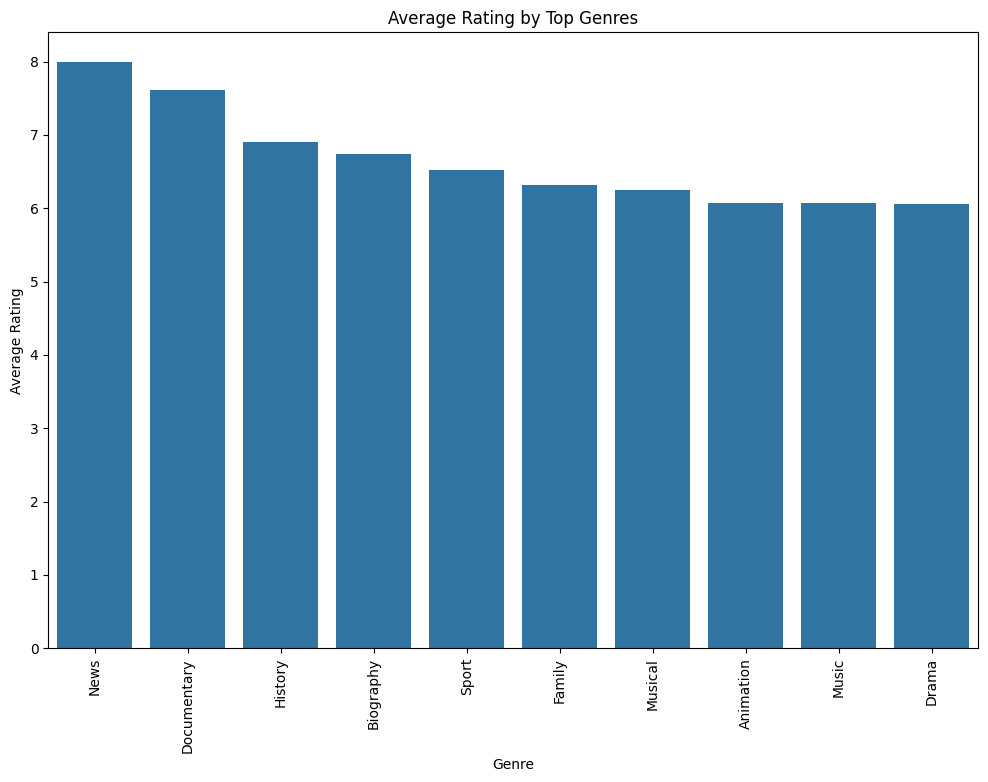

In [17]:
# Create and save bar plot of average rating by top genres
plt.figure(figsize=(12, 8))
top_genres_ratings = imdb_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_ratings.index, y=top_genres_ratings.values)
plt.title('Average Rating by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.savefig('top_genres_ratings.png')
plt.show()

# 9: Predict Rating for Sample Data

In [18]:
# For testing, create a new dataframe with sample data
data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
sample_data = pd.DataFrame(data)

# Predict the movie rating
predicted_rating = model.predict(sample_data)

# Display the predicted result
print("Predicted Rating for Sample Data:", predicted_rating[0])

Predicted Rating for Sample Data: 4.207458962134328


# 10: Save Model and Preprocessing Information

In [19]:
# Save the model and preprocessing information
joblib.dump(model, 'movie_rating_model.pkl')

# Save preprocessing information
preprocessing_info = {
    'Genre_mean_rating': imdb_df.groupby('Genre')['Rating'].mean().to_dict(),
    'Director_encoded': imdb_df.groupby('Director')['Rating'].mean().to_dict(),
    'Actor1_encoded': imdb_df.groupby('Actor 1')['Rating'].mean().to_dict(),
    'Actor2_encoded': imdb_df.groupby('Actor 2')['Rating'].mean().to_dict(),
    'Actor3_encoded': imdb_df.groupby('Actor 3')['Rating'].mean().to_dict()
}
joblib.dump(preprocessing_info, 'preprocessing_info.pkl')

['preprocessing_info.pkl']